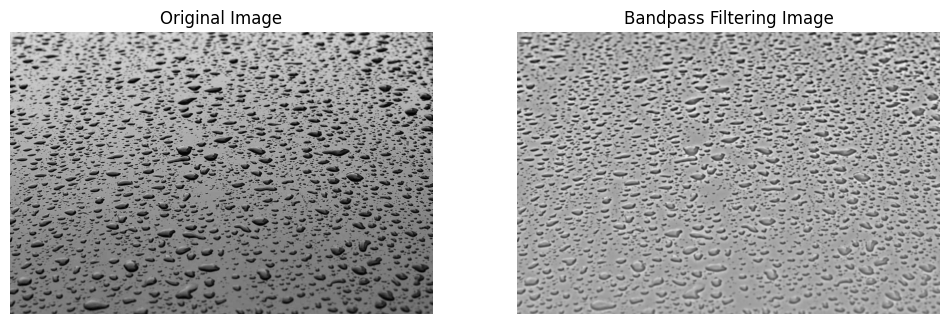

In [1]:
from skimage import io
from skimage.filters import difference_of_gaussians, threshold_otsu
from skimage.draw import line
from matplotlib import pyplot as plt

# Loading an image file as gray scale
img = io.imread('sample-wallpaper-abstract-structure.jpg')[:,:,0]

# Display images w/ and w/o bandpass filtering
Fig, axes = plt.subplots(1, 2, figsize=(12,6))
ax = axes.ravel()
# Original image
ax[0].imshow(img, 'gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Bandpass filtered image
bp_image = difference_of_gaussians(img, 1, 5)
# Normalization
bp_image = 255 * (bp_image - bp_image.min()) / (bp_image.max() - bp_image.min())
ax[1].imshow(bp_image, 'gray')
ax[1].set_title('Bandpass Filtering Image')
ax[1].axis('off')

plt.show()

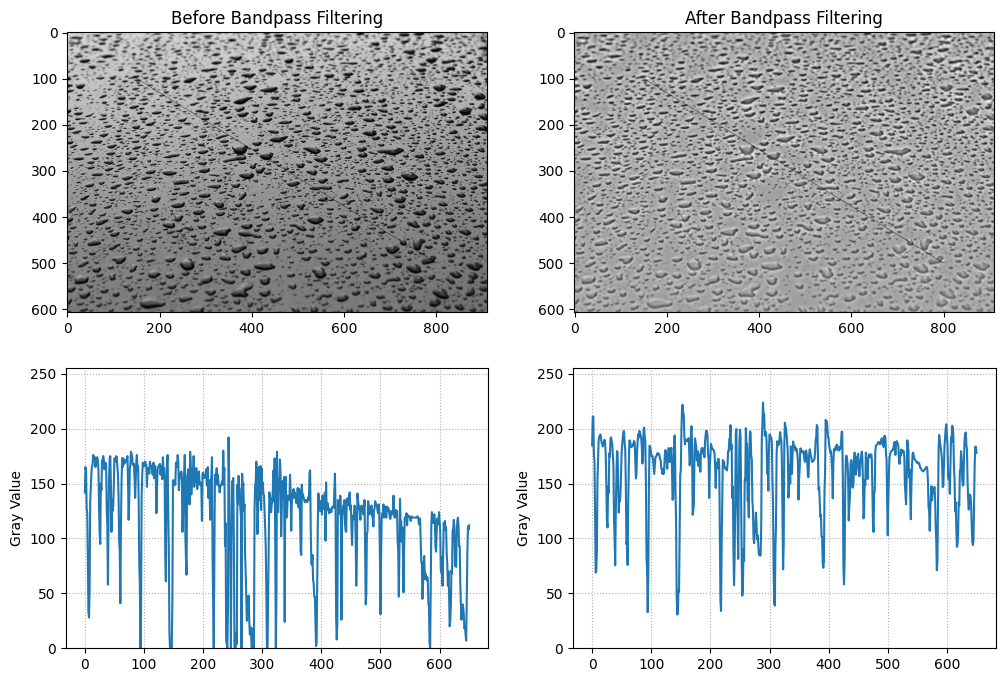

In [2]:
# Function for drawing a diagonal
def draw_diaglonal(img, rr, cc):
    img_c = img.copy()   
    img_c[rr,cc] = 0
    return img_c

# Coordinate of a diagonal
rr, cc = line(100,150,500,800)

Fig, axes = plt.subplots(2, 2, figsize=(12,8))
ax = axes.ravel()

# Show images with diagonals
img_diag = draw_diaglonal(img, rr, cc)
ax[0].imshow(img_diag, 'gray')
ax[0].set_title('Before Bandpass Filtering')
bp_image_diag = draw_diaglonal(bp_image, rr, cc)
ax[1].imshow(bp_image_diag, 'gray')
ax[1].set_title('After Bandpass Filtering')

# Brightness distribution on a diagonal
ax[2].plot(img[rr,cc])
ax[2].set_ylim(0,255)
ax[2].set_ylabel('Gray Value')
ax[2].grid(linestyle='dotted')
ax[3].plot(bp_image[rr,cc])
ax[3].set_ylim(0,255)
ax[3].set_ylabel('Gray Value')
ax[3].grid(linestyle='dotted')

plt.show()

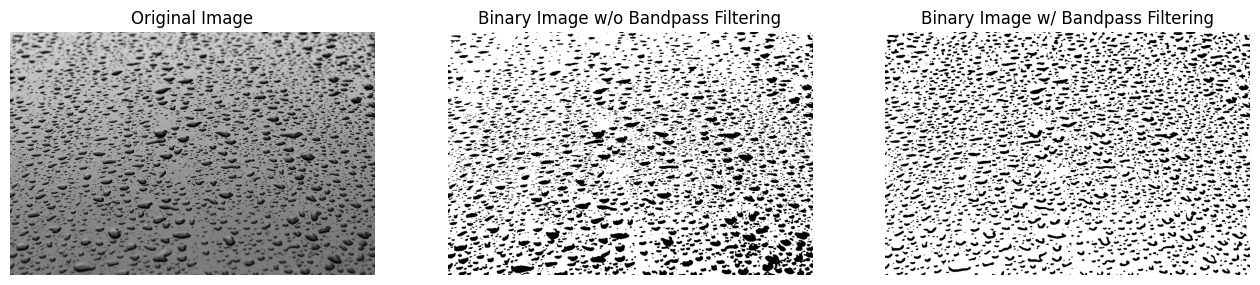

In [3]:
# Display the binarized images
Fig, axes = plt.subplots(1, 3, figsize=(16,8))
ax = axes.ravel()

# Original image
ax[0].imshow(img, 'gray')
ax[0].axis('off')
ax[0].set_title('Original Image')

# Directly binarized image
thresh1 = threshold_otsu(img)
ax[1].imshow(img > thresh1, 'gray')
ax[1].axis('off')
ax[1].set_title('Binary Image w/o Bandpass Filtering')

# Binarized image with bandpass filtering
thresh2 = threshold_otsu(bp_image)
ax[2].imshow(bp_image > thresh2, 'gray')
ax[2].axis('off')
ax[2].set_title('Binary Image w/ Bandpass Filtering')

plt.show()